In [1]:
# Importamos las librerías necesarias para la creación de la red neuronal
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix
import os
from sklearn.utils import shuffle
from keras.callbacks import EarlyStopping
import seaborn as sn
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# Vemos las carpetas que se encuentran en ese directorio
print(os.listdir('./fotos bicis/'))

['bicicletas test', 'bicicletas train']


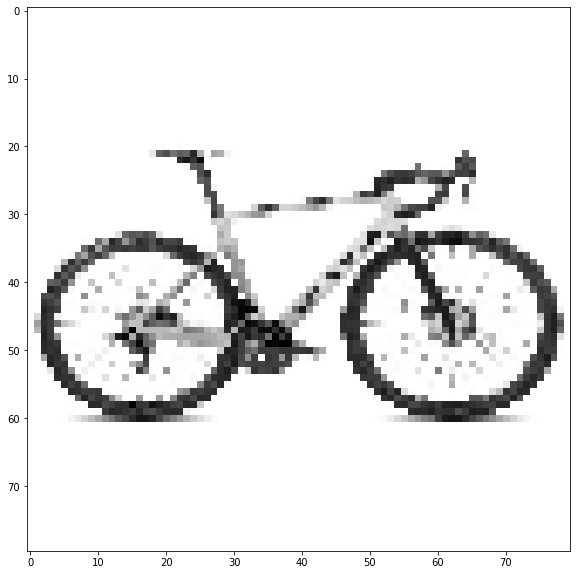

In [3]:
#creamos un main_dir y un train_dir para el path. Establecemos la ruta de las fotos de train
main_dir = './fotos bicis/'
train_dir = 'bicicletas train'

#Path es la dirección que vamos a tomar para las imágenes de train
path = os.path.join(main_dir,train_dir) 

#imprimimos la primera imagen del conjunto de train
plt.figure(figsize=(10,10))
for p in os.listdir(path):
    category = p.split('.')[0]
    img_array = cv2.imread(os.path.join(path,p), cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize=(80,80))
    plt.imshow(new_img_array, cmap = 'gray')
    break

In [4]:
#Establecemos la 'X', mediante un array con las imágenes y la 'y'
X_train = []
y_train = []

#Defino etiqueta 0 y 1. Carretera 1 y MTB 0
convert = lambda category : int(category == 'carretera')

#Mediante esta función estableceremos que es 'X_train' e 'y_train'
def create_test_data(path):
    for p in os.listdir(path):
        category = p.split('.')[0]
        category = convert(category) #convert es la lambda de arriba
        img_array = cv2.imread(os.path.join(path,p), cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80,80))
        X_train.append(new_img_array)
        y_train.append(category)

In [5]:
#usamos la función de arriba para terminar por definir 'X_train e 'y_train'. Cambiamos la dimensión de 'X'
create_test_data(path)
X_train = np.array(X_train).reshape(-1, 80,80,1)
y_train = np.array(y_train)

In [6]:
print('X_train size:',X_train.shape)
print('y_train size:',y_train.shape)

X_train size: (1759, 80, 80, 1)
y_train size: (1759,)


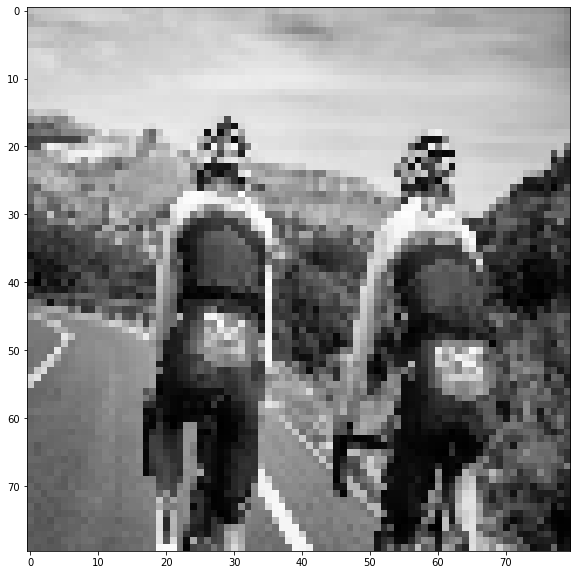

In [7]:
#Hago lo mismo que en el apartado anterior para las imágenes de 'X_test'
main_dir = './fotos bicis/'
test_dir = 'bicicletas test'

path1 = os.path.join(main_dir, test_dir) 
plt.figure(figsize=(10,10))
for p in os.listdir(path1):
    category = p.split('.')[0]
    img_array = cv2.imread(os.path.join(path1,p), cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize=(80,80))
    plt.imshow(new_img_array, cmap = 'gray')
    break

In [8]:
# Establezco los nombres de las clases, por si en algún momento hacen falta
class_names = ['carretera', 'mtb']

In [9]:
X_test = []
y_test = []

convert = lambda category : int(category == 'carretera')
#Defino etiqueta 0 y 1. Carretera 1 y MTB 0

def create_test1_data(path):
    for p in os.listdir(path):
        category = p.split('.')[0]
        category = convert(category) #convert es la lambda de arriba
        img_array = cv2.imread(os.path.join(path,p), cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80,80))
        X_test.append(new_img_array)
        y_test.append(category)

In [10]:
create_test1_data(path1)
X_test = np.array(X_test).reshape(-1, 80,80,1)
y_test = np.array(y_test)

In [11]:
print('X_test size:',X_test.shape)
print('y_test size:',y_test.shape)

X_test size: (199, 80, 80, 1)
y_test size: (199,)


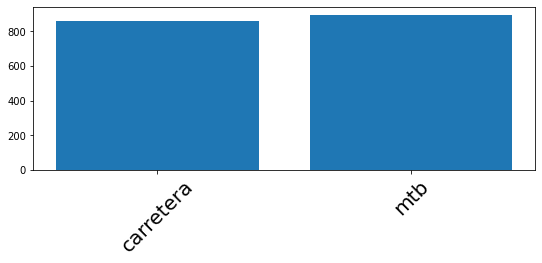

In [12]:
'''
vemos si las muestras en train están balanceadas con este gráfico de barras.
Comprobamos se encuentra balanceado.
'''
plt.figure(figsize=(9, 3))

y_unique = np.unique(y_train)
counts = [(y_train == i).sum() for i in y_unique]

plt.xticks(y_unique,  class_names)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45, size=20)
_ = plt.bar(y_unique, counts)

In [13]:
'''
Vemos la cantidad de fotografía que tenemos para cada clase.
'''

print('Número carretera:', counts[0])
print('Número MTB:', counts[1])

Número carretera: 862
Número MTB: 897


In [14]:
'''
Normalizo los datos de 'X_train', dividimos entre 255 porque es el número que define el tono más oscuro en la escala de grises
'''
X_train = X_train/255.0

In [15]:
'''
Hacemos una mezcla de 'X_train' e 'y_train'
'''
X_train,y_train = shuffle(X_train,y_train, random_state = 42)

In [16]:
'''
Creo el modelo:
- Modelo sequential
- Input convolución de tamaño (2,2) con una activación 'relu'. C
- Creamos 3 capas ocultas convolución con 2 con 32 nodos y 1 con 64 con un tamaños (2,2) en el kernel. Activation 'relu'.
- Una capa que aplana con 32 nodos.
- La capas con Maxpooling, todas cuentas con un tamaño de (2,2)
- Creo una capa de salida con 1, estableciento la activation 'sigmoid' ya que es la más eficaz para una clasificación binaria.
'''

model = Sequential()
model.add(Conv2D(32, (2,2), activation = 'relu', input_shape = X_train.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32,(2,2), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(2,2), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32,(2,2), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(32, activation = 'relu'))


model.add(Dense(1, activation = 'sigmoid'))

In [17]:
'''
Compilo el modelo con un optimizador 'adam', loss 'binary_crossentropy y de métrica 'accuracy'.
He probado los diferentes optimazadores y el que mejor resultado me ha dado ha sido con 'adam'. Con 'Nadam' optenía unos resultado similares, 
Quizás algo por debajo del seleccionado.
'''
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [18]:
# Podemos ver el resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 79, 79, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 38, 38, 32)        4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          8

In [19]:
# Generamos más imágenes
'''
datagen = ImageDataGenerator(featurewise_center = False,
                            samplewise_center = False,
                            featurewise_std_normalization = False,
                            samplewise_std_normalization = False,
                            zca_whitening = False,
                            rotation_range = 5, 
                            zoom_range = 0.1, 
                            width_shift_range = 0.1, 
                            height_shift_range = 0.1, 
                            horizontal_flip = False,
                            vertical_flip = False)
datagen.fit(X_train)


He generado más imágenes fake con la sentencia anterior. He visto que al entrenar el modelo iba mucho más lento.
Según las métricas, el modelo generalizaba peor, y no por eso me he decantado por no usarlo finalmente.

'''

'\ndatagen = ImageDataGenerator(featurewise_center = False,\n                            samplewise_center = False,\n                            featurewise_std_normalization = False,\n                            samplewise_std_normalization = False,\n                            zca_whitening = False,\n                            rotation_range = 5, \n                            zoom_range = 0.1, \n                            width_shift_range = 0.1, \n                            height_shift_range = 0.1, \n                            horizontal_flip = False,\n                            vertical_flip = False)\ndatagen.fit(X_train)\n'

In [20]:
#Establezco un 'earlystop' con una paciencia de 6
'''
Con el EarlyStop establecemos que con una pacienciencia de 6 (se refiere a épocas), si no se mejoran las métricas en el entrenamiento, 
éste se para.
'''
earlystop = EarlyStopping(patience = 6, restore_best_weights = True)

In [21]:
'''
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 50),
                             epochs = 15, 
                              validation_data = (X_test, y_test)) 
                              #steps_per_epoch = X_train.shape[0]//batch_size)

En esta sentencia, tenía el entrenamiento para el modelo y las imágenes que cree fake y que finalmente no usé

'''

'\nhistory = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 50),\n                             epochs = 15, \n                              validation_data = (X_test, y_test)) \n                              #steps_per_epoch = X_train.shape[0]//batch_size)\n                              '

In [22]:
#Entreno el modelo con 14 épocas un tamaño de batch de 45, con un 30% para la validación y por último añadimos el 'earlystop'
history = model.fit(X_train,y_train, epochs = 14, batch_size = 45, validation_split= 0.3,callbacks = [earlystop] )  

Epoch 1/14
28/28 [==============================] - 4s 109ms/step - loss: 0.6969 - accuracy: 0.5148 - val_loss: 0.6948 - val_accuracy: 0.4811
Epoch 2/14
28/28 [==============================] - 2s 80ms/step - loss: 0.6907 - accuracy: 0.5198 - val_loss: 0.6924 - val_accuracy: 0.4811
Epoch 3/14
28/28 [==============================] - 2s 80ms/step - loss: 0.6852 - accuracy: 0.5381 - val_loss: 0.6891 - val_accuracy: 0.4867
Epoch 4/14
28/28 [==============================] - 2s 79ms/step - loss: 0.6842 - accuracy: 0.5526 - val_loss: 0.6714 - val_accuracy: 0.5890
Epoch 5/14
28/28 [==============================] - 2s 80ms/step - loss: 0.6589 - accuracy: 0.6172 - val_loss: 0.6661 - val_accuracy: 0.5947
Epoch 6/14
28/28 [==============================] - 2s 79ms/step - loss: 0.6454 - accuracy: 0.6585 - val_loss: 0.6543 - val_accuracy: 0.6098
Epoch 7/14
28/28 [==============================] - 2s 81ms/step - loss: 0.6032 - accuracy: 0.6677 - val_loss: 0.7171 - val_accuracy: 0.5777
Epoch 8/14
2

In [23]:
def plot_accuracy_loss(history):
    '''
    Con esta función plotearemos el 'accuracy' y el 'loss'de mi modelo, tanto para train como para validación
    '''
    
    fog = plt.figure(figsize = (15,10))
    
    #plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'], 'bo--', label = 'acc')
    plt.plot(history.history['val_accuracy'], 'ro--', label = 'val_acc')
    plt.title('train_acc vs val_acc')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend()
    
    plt.subplot(222)
    plt.plot(history.history['loss'], 'bo--', label = 'loss')
    plt.plot(history.history['val_loss'], 'ro--', label = 'val_loss')
    plt.title('train_loss vs val_loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend()

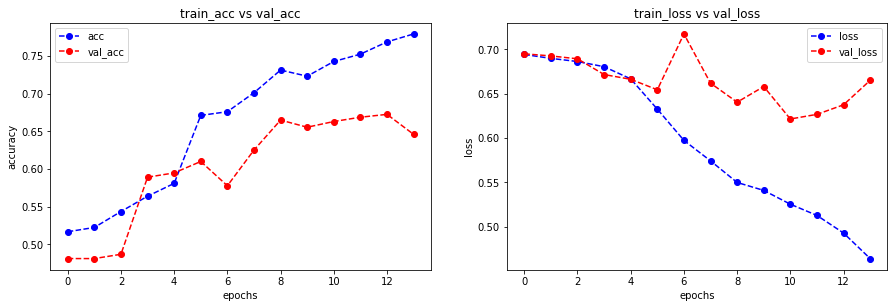

In [24]:
#Usamos la función que hemos definido en la celda anterior, para plotear nuestras métricas
plot_accuracy_loss(history)

In [25]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc", results)

7/7 [==============================] - 0s 22ms/step - loss: 63.7403 - accuracy: 0.7236
test loss, test acc [63.74026870727539, 0.7236180901527405]


In [26]:
#Generamos las predicciones del modelo con los datos de Test
predictions = model.predict(X_test)

In [27]:
#Con esta sentencia estamos sacando que predecimos para cada imagen de Test
predicted_val = [int(round(p[0])) for p in predictions]

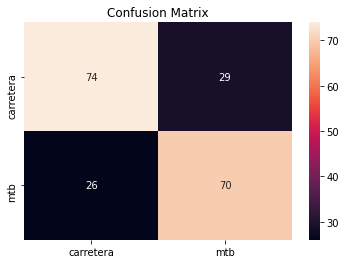

In [28]:
#Creamos la matriz de confusión para ver qué tal funciona nuestro modelo con las imágenes de test.

CM = confusion_matrix(y_test, predicted_val)

ax = plt.axes()
sn.heatmap(CM, annot=True,
          annot_kws = {'size': 10},
          xticklabels = class_names, 
          yticklabels = class_names, ax = ax)
ax.set_title('Confusion Matrix');


In [29]:
#Vemos las métricas generales del modelo. Por lo que podemos ver es que mi modelo predice un 22% mejor que el 50%, la peor métrica existente
#No es el mejor resultado que podría obtener del modelo pero tampoco es el peor
print(classification_report(y_test, predicted_val, target_names=class_names))

              precision    recall  f1-score   support

   carretera       0.74      0.72      0.73       103
         mtb       0.71      0.73      0.72        96

    accuracy                           0.72       199
   macro avg       0.72      0.72      0.72       199
weighted avg       0.72      0.72      0.72       199



In [30]:
#Vemos el dato de pérdida y el accuracy de los datos de test
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

7/7 - 0s - loss: 63.7403 - accuracy: 0.7236
